## Código con uso de framework (scikit-learn (SGDRegressor)

###Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución. (Portafolio Implementación)

###A01742102 Fernanda Pérez

Cargué las librerias necesarias para correr el modelo

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Importé el archivo de Valhalla23.csv para visualizar la información con la que voy a trabajar. Obteniendo las columnas de grados en "Celsius" y "Valks". Siendo mi base de datos de 100 filas.

In [2]:
df = pd.read_csv('/content/Valhalla23.csv')

print(df.head(15))
print("Contiene ",len(df), "filas")

    Celsius    Valks
0   61.4720 -139.740
1   70.5790 -156.600
2   -7.3013   73.269
3   71.3380 -165.420
4   43.2360  -75.835
5  -10.2460   83.437
6    7.8498   24.680
7   34.6880  -55.108
8   75.7510 -182.820
9   76.4890 -183.460
10  -4.2387   61.973
11  77.0590 -171.990
12  75.7170 -175.830
13  28.5380  -30.998
14  60.0280 -142.490
Contiene  100 filas


Grafiqué los datos reales del dataset

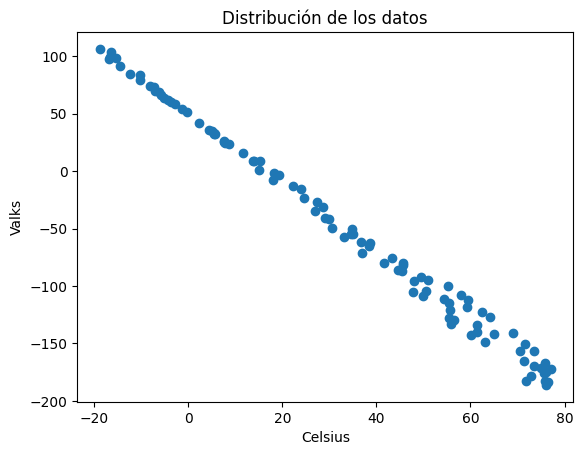

In [3]:
plt.scatter(df['Celsius'], df['Valks'])
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Distribución de los datos')
plt.show()

Definí la variable independiente (X) y dependiente (y) de esta manera ya que tiene más sentido convertir de Celcius (una medida de temperatura con la que si estamos familiarizados) a Vaks (medida de temperatura que desconocemos).

Dividí los datos en mis conjuntos de entrenamiento,20% será para pruebas mientras que el 80% restante será usado para entrenar al modelo. Y de manera aleatoria seleccioné mi random_state en 35.

In [4]:
X = df[['Celsius']]  #independiente
Y = df['Valks']    #dependiente

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=35)

Se estandarizan las caracteristicas del dataset (se ajusta la media 0 y la desviación estandar 1) , para que se manejen en la misma escala.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se crea el modelo de regresión lineal haciendo uso de descenso de gradiente estocástico, se seleccionan como maximo 500 iteraciones ya que con estas fueron suficientes para que el modelo se ajustara de manera correcta y no se seleccionó un numero mayor de itearciones para evitar sobreajuste. Y al fijar la tolerancia en (0.001) ayuda a dar un ajuste más preciso sin requerir tantas iteraciones y evitar aumentar el tiempo de entrenamiento. Se entrena  y se  hace predicciones sobre el conjunto de prueba

In [6]:
model = SGDRegressor(max_iter=150, tol=1e-5)
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

Se grafican los datos reales y las predicciones

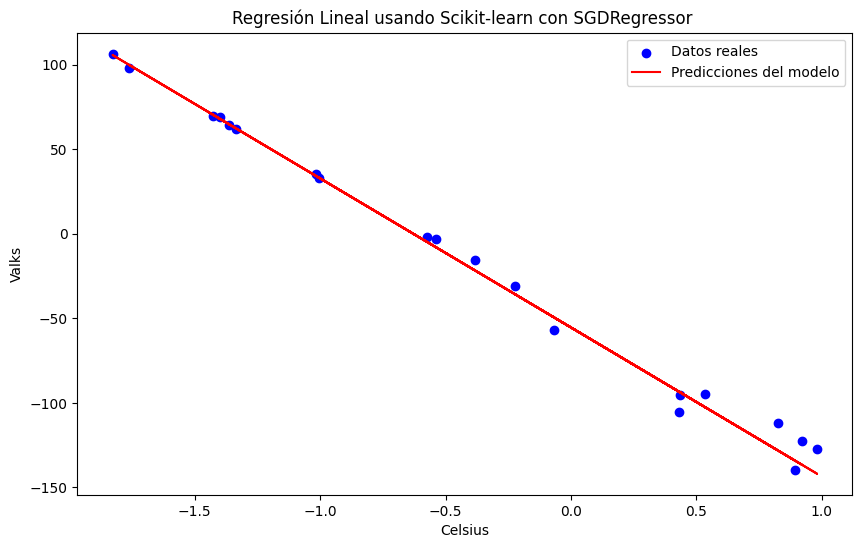

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, Y_test, color="blue", label="Datos reales")
plt.plot(X_test_scaled, Y_pred, color="red", label="Predicciones del modelo")
plt.xlabel("Celsius")
plt.ylabel("Valks")
plt.title("Regresión Lineal usando Scikit-learn con SGDRegressor ")
plt.legend()
plt.show()

En esta gráfica de regresión lineal se observa la variable independiente 'Celcius' en el eje x, y la varibale dependiente 'valks' en el eje y. Los puntos azules son los datos reales de nuestro dataset y la linea roja representa las predicciones del modelo.

In [8]:
r2 = r2_score(Y_test, Y_pred)
print(f'El R^2 del modelo es: {r2}')


El R^2 del modelo es: 0.9917891721443519


Los resultados son satisfactorios ya que por medio del coeficinte de determinación de  R^2 sabemos que el modelo explica el 99.1% de la variabilidad de Valks respecto a Celcius.

In [9]:
m = model.coef_[0]
b = model.intercept_

print(f'La pendiente del modelo es: {m}')
print(f'El intercepto del modelo es: {b}')


La pendiente del modelo es: -88.14195865069425
El intercepto del modelo es: [-55.42355202]


Al tener una pendiente negativa (-88.1064) sabemos que la relación entre Celcius y Valks es inversa, o sea confome los grados en Celcius aumentan los grados en Valks disminuyen y viceversa.

Calculo el root mean square error

In [16]:
rmse= np.sqrt(np.mean((Y_pred - Y_test)**2))
rmse

7.3313878343525305

El rmse nos permite interpretar directamente la magnitud del error, al tener un valor bajo podemos decir que si es aceptable para nuestro modelo.

In [19]:
print("Ecuación del modelo de regresión lineal con scikit-learn:", "Valks =", m , "x" , "Celcius + ", b)

Ecuación del modelo de regresión lineal con scikit-learn: Valks = -88.14195865069425 x Celcius +  [-55.42355202]
